# Interactive Session - Results Dashboard

This notebook reads Google Sheet outputs from the Streamlit app and builds clean, presentation-ready plots for all games.

In [80]:
import numpy as np
import pandas as pd
import gspread
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme(style='whitegrid', context='talk')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titleweight'] = 'bold'
dark_color = "#AF4635"
medium_color = "#FF9145"
light_color = "#FFF6E1"
dark_light = "#FFEBBF"
lightlight = "#FFFDF5"


In [81]:
gc = gspread.service_account(filename='secrets/credentials.json')
url = 'https://docs.google.com/spreadsheets/d/1JDK7sivX9e5oASLcWDIYHVAyduL5N3JcfSilDdvgkgc/edit?usp=sharing'
book = gc.open_by_url(url)

def read_sheet(book, sheet_name):
    return pd.DataFrame(book.worksheet(sheet_name).get_all_records())

def user_columns(df, base_cols):
    return [c for c in df.columns if c not in base_cols and not str(c).startswith('Unnamed')]

def melt_user_matrix(df, base_cols, value_name):
    users = user_columns(df, base_cols)
    if not users:
        return pd.DataFrame(columns=['user', value_name])
    out = df[users].melt(var_name='user', value_name=value_name).dropna()
    return out

In [82]:
sheet_names = ['game1', 'game3s', 'game3t', 'game4s', 'game4t', 'game5', 'scores']
dfs = {name: read_sheet(book, name) for name in sheet_names}
{k: v.shape for k, v in dfs.items()}

{'game1': (20, 3),
 'game3s': (40, 28),
 'game3t': (40, 28),
 'game4s': (20, 31),
 'game4t': (20, 28),
 'game5': (1, 28),
 'scores': (4, 27)}

## Game 1 - Word Recall
Most remembered words across all participants.

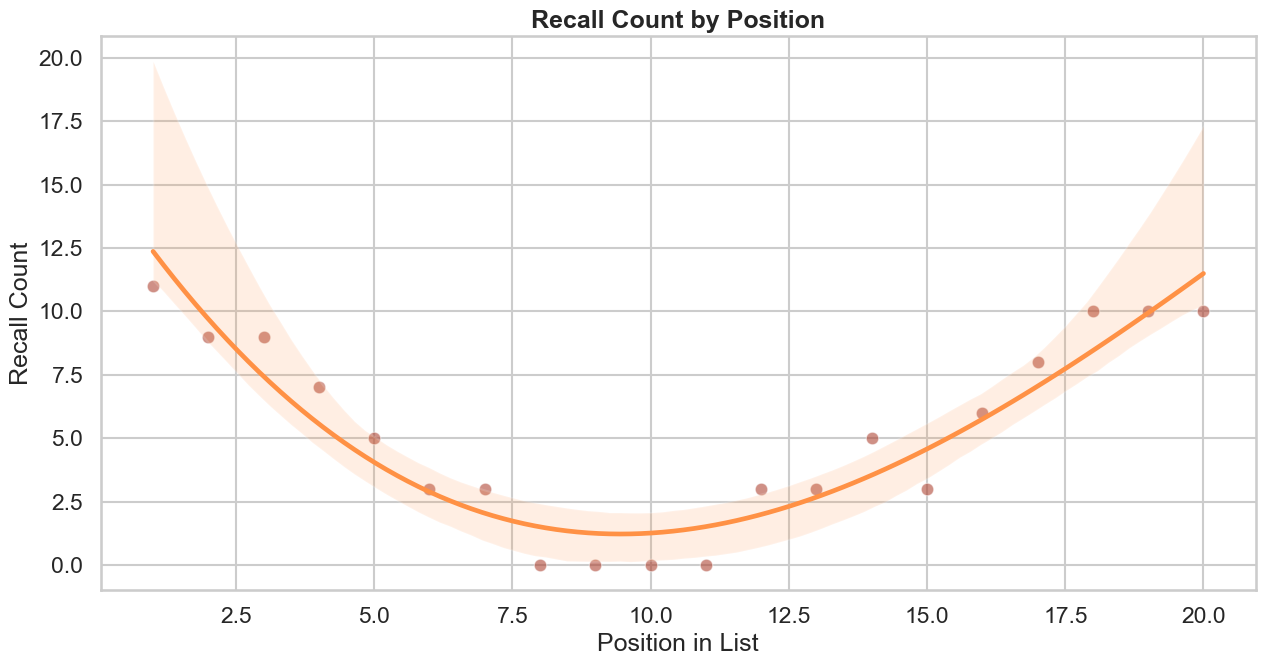

In [83]:
# Fit a curve (degree 3 polynomial) to highlight primauté and récence effects in data word recall positions
df1 = dfs['game1'].copy()
word_col = 'WORD' if 'WORD' in df1.columns else ('MOT' if 'MOT' in df1.columns else None)

if word_col is not None:
    plt.figure(figsize=(13, 7))
    df1['POSITION'] = df1.index + 1
    ax = sns.scatterplot(data=df1, x='POSITION', y='COUNT', alpha=0.6, c=dark_color)
    sns.regplot(data=df1, x='POSITION', y='COUNT', scatter=False, ax=ax, color=medium_color, order=3)
    ax.set_title('Recall Count by Position')
    ax.set_xlabel('Position in List')
    ax.set_ylabel('Recall Count')
    plt.tight_layout()
    plt.show()  

## Game 2 (Attention) - Accuracy and Reaction Time

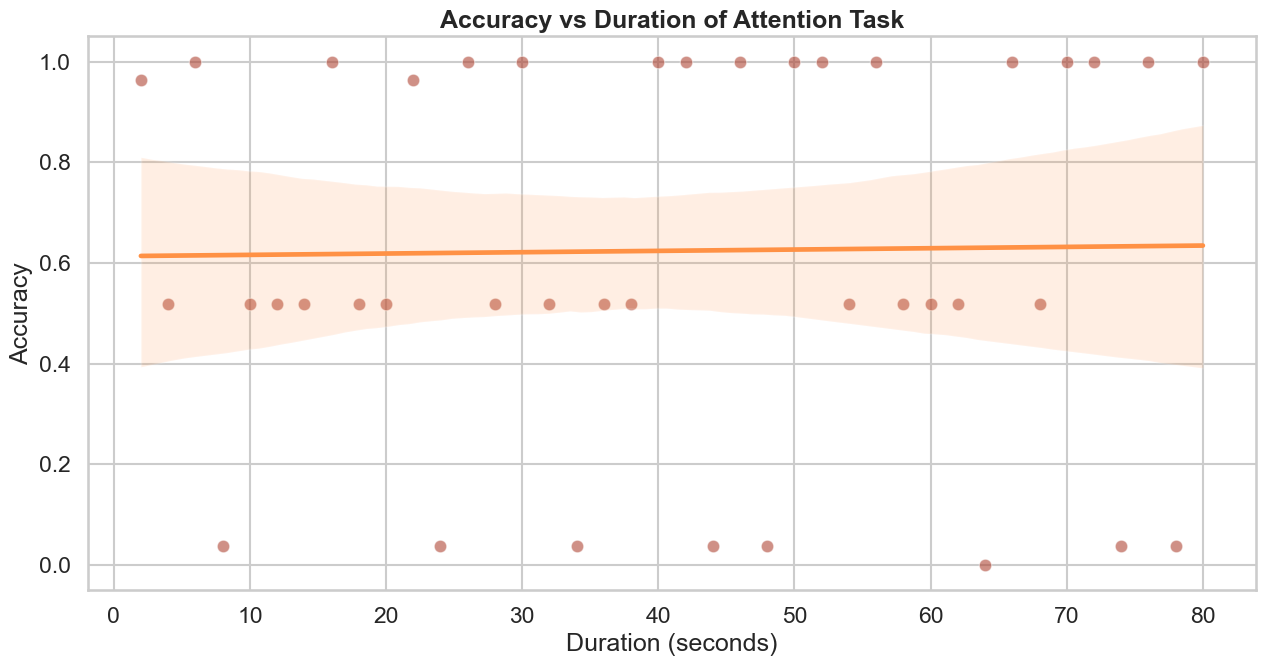

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
# Highlight the effect of duration of the attention task on accuracy and reaction times

g3s = dfs['game3s'].copy()
g3t = dfs['game3t'].copy()

user_index = 1  # first column is letter 

g3s['accuracy'] = [np.mean(list(g3s[g3s.index == i].values)[0][user_index:]) for i in g3s.index]
g3s['duration'] = 2*(g3s.index + 1)


plt.figure(figsize=(13, 7))
ax = sns.scatterplot(data=g3s, x='duration', y='accuracy', alpha=0.6, c=dark_color)
sns.regplot(data=g3s, x='duration', y='accuracy', scatter=False, ax=ax, color=medium_color)
ax.set_title('Accuracy vs Duration of Attention Task')
ax.set_xlabel('Duration (seconds)')
ax.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()  


g3t['reaction_time'] = [np.mean(list(g3t[g3t.index == i].values)[0][user_index:])*100 for i in g3t.index]
g3t['duration'] = 2*(g3t.index + 1)


plt.figure(figsize=(13, 7))
ax = sns.scatterplot(data=g3t, x='duration', y='reaction_time', alpha=0.6, c=dark_color)
sns.regplot(data=g3t, x='duration', y='reaction_time', scatter=False, ax=ax, color=medium_color)
ax.set_title('Reaction Time vs Duration of Attention Task')
ax.set_xlabel('Duration (seconds)')
ax.set_ylabel('Reaction Time (ms)')
plt.tight_layout()
plt.show()  

## Game 3 (Stroop) - Accuracy and Reaction Time

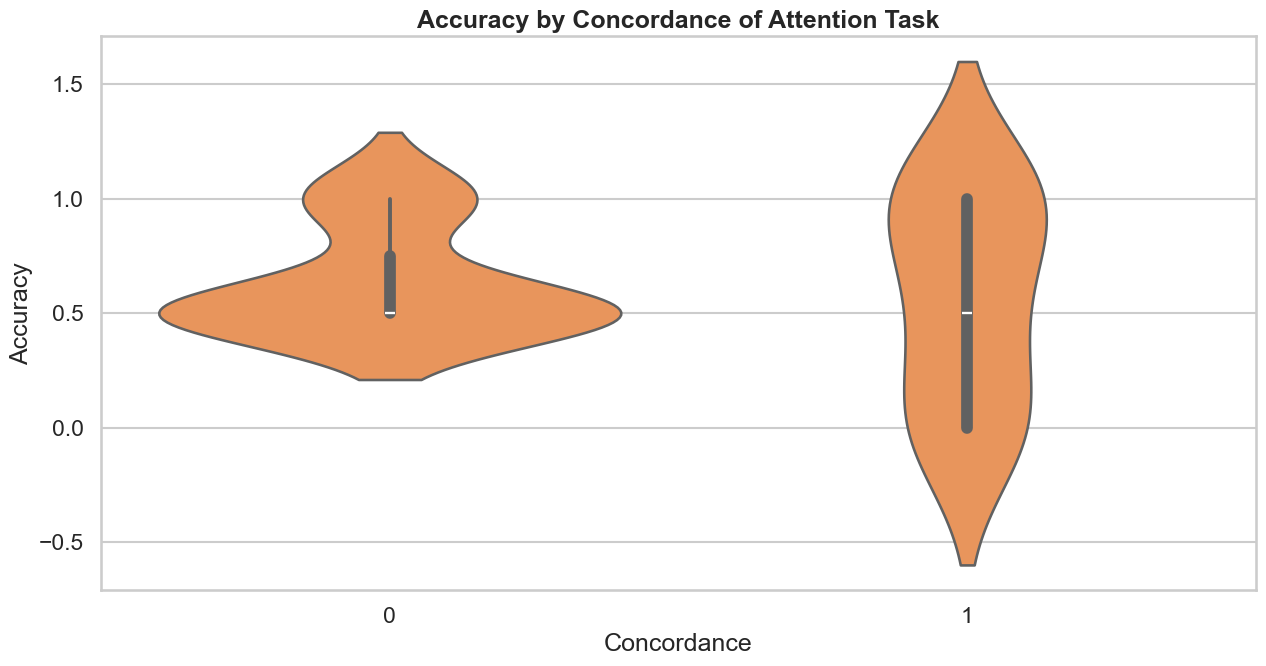

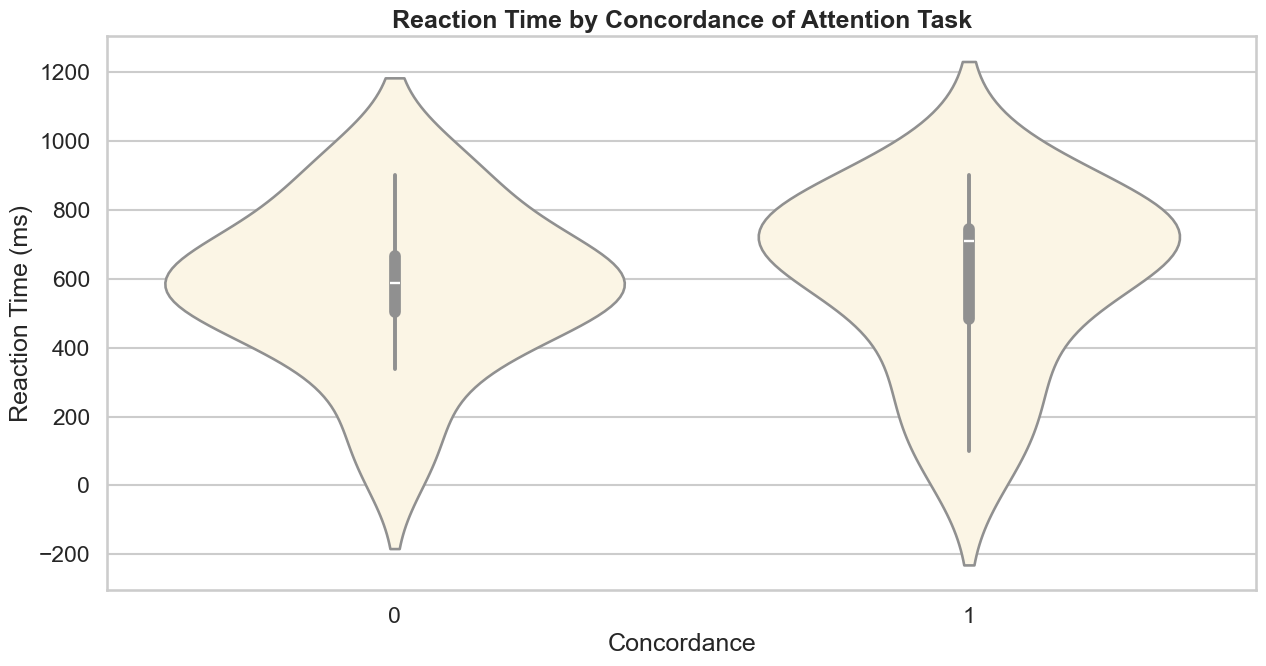

In [ ]:
# plot the correlation between "concordant' and accuracy in the attention task based on game4s and game4t

user_index = 4  # first columns are name, nom, color, concordant

g4s = dfs['game4s'].copy()
g4t = dfs['game4t'].copy()

users = g4s.columns[1:-1]  # first column is 'LETTER'
g4s['accuracy'] = [np.mean(list(g4s[g4s.index == i].values)[0][user_index:]) for i in g4s.index]

# make 2 box plots to compare accuracy in concordant vs non-concordant conditions
plt.figure(figsize=(13, 7))
ax = sns.violinplot(data=g4s, x='concordant', y='accuracy', color=medium_color)
ax.set_title('Accuracy by Concordance of Attention Task')
ax.set_xlabel('Concordance')
ax.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()


# same for reaction times in game4t
g4s['reaction_time'] = [np.mean(list(g4t[g4t.index == i].values)[0][user_index:])*100 for i in g4t.index]
plt.figure(figsize=(13, 7))
ax = sns.violinplot(data=g4s, x='concordant', y='reaction_time', color=light_color)
ax.set_title('Reaction Time by Concordance of Attention Task')
ax.set_xlabel('Concordance')
ax.set_ylabel('Reaction Time (ms)')
plt.tight_layout()
plt.show()

## Game 4 (Time Estimation) and Global Scores

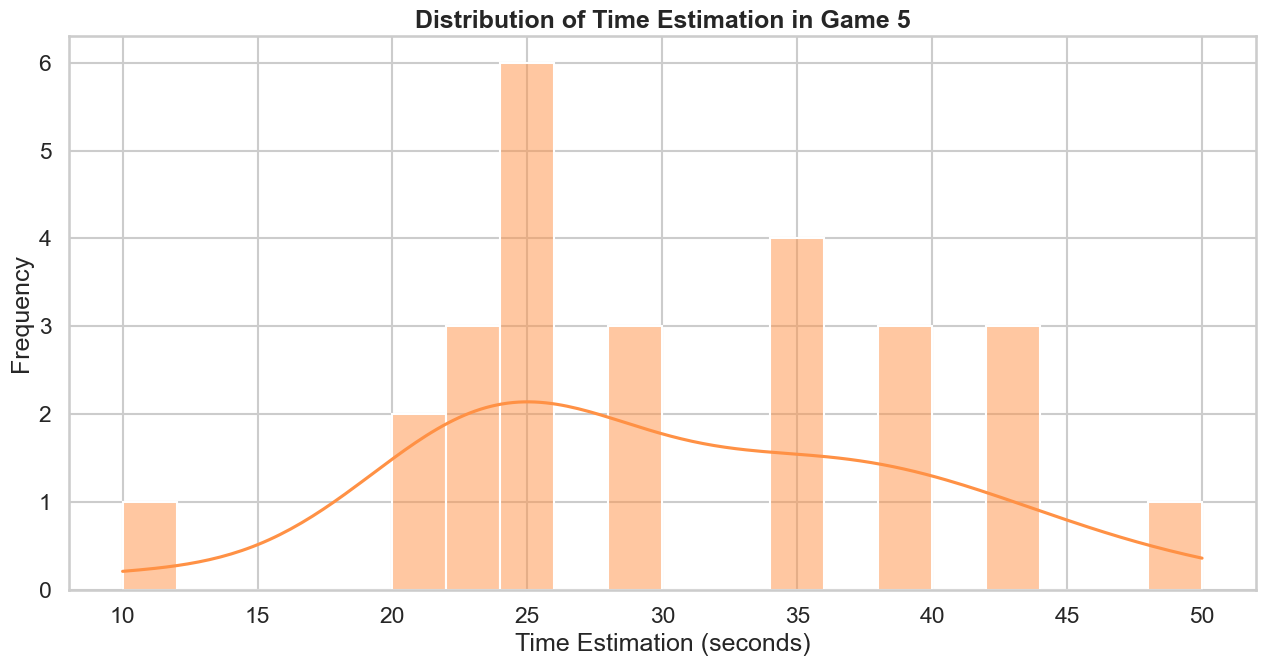

In [ ]:
# show distribution of time estimation in game5 

g5 = dfs['game5'].copy()

user_index = 1 # first column is real duration 
time_index = 0

time_estimation = [g5[u][time_index] for u in g5.columns[user_index:]]

plt.figure(figsize=(13, 7))
ax = sns.histplot(time_estimation, bins=20, kde=True, color=medium_color)
ax.set_title('Distribution of Time Estimation in Game 5')
ax.set_xlabel('Time Estimation (seconds)')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\melina.scopin\AppData\Local\Temp\ipykernel_44104\1334094189.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



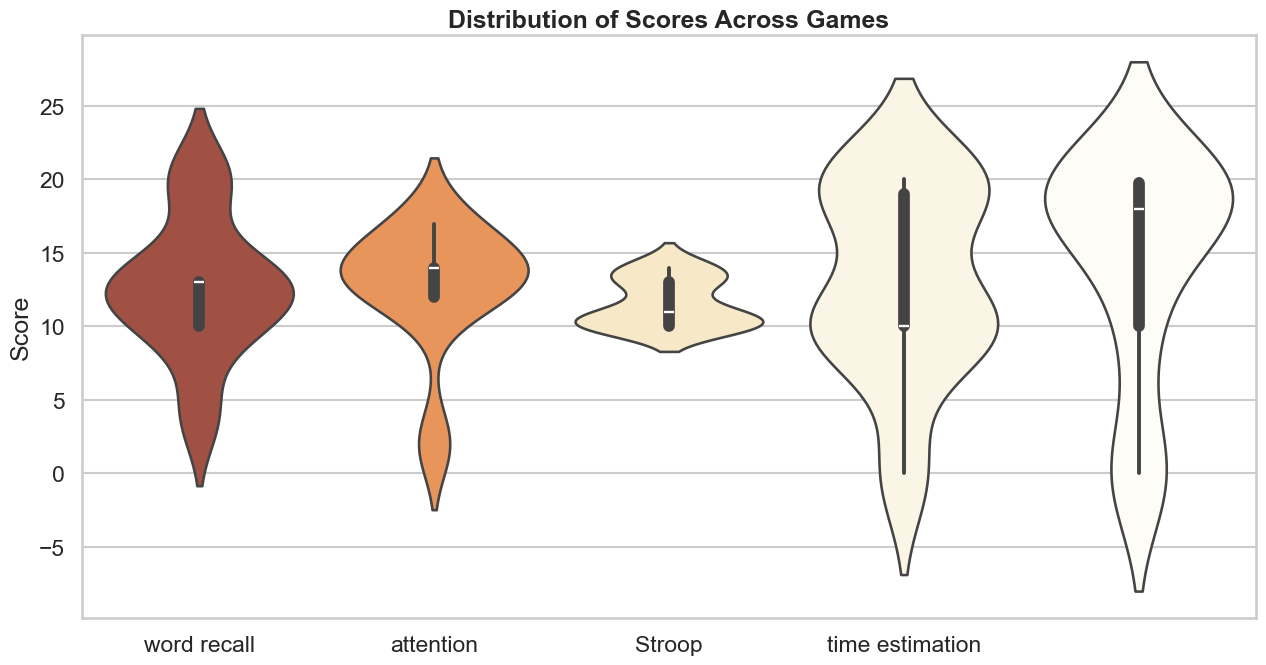

Text(0.5, 1.0, 'Correlation of Scores Across Games')

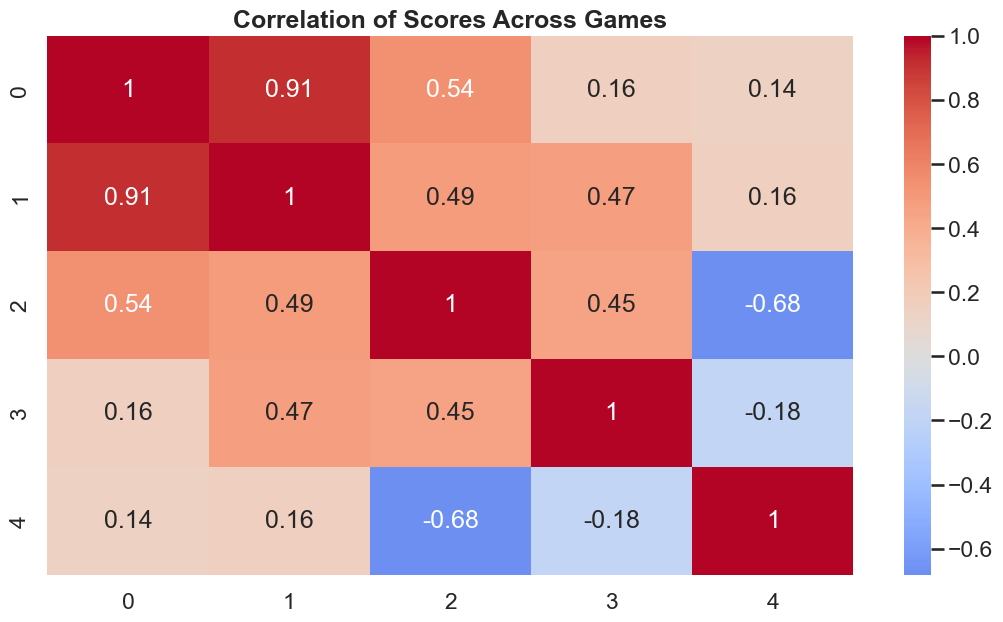

In [ ]:
# We want to compare the scores of the different games and see if there is a correlation between them

scores = dfs['scores'].copy()

user_index = 1 # first column is game

games_scores = []

for game in scores.index : 
    game_scores = list(scores[scores.index == game].values)[0][user_index:]
    games_scores.append(game_scores)

games_scores_df = pd.DataFrame(games_scores, index=scores.index, columns=scores.columns[user_index:]).T

# first just see violin plots of scores in each game

game_names = ['word recall', 'attention', 'Stroop', 'time estimation', '']
plt.figure(figsize=(13, 7))
ax = sns.violinplot(data=games_scores_df, palette=[dark_color, medium_color, dark_light, light_color, lightlight])
ax.set_title('Distribution of Scores Across Games') 
ax.set_ylabel('Score')
ax.set_xticklabels(game_names)
plt.tight_layout()
plt.show()

# then show correlation between scores in different games

plt.figure(figsize=(13, 7))
sns.heatmap(games_scores_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Scores Across Games')
